<a href="https://colab.research.google.com/github/mitesh98/HumanActivityRecognition/blob/master/HAR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HumanActivityRecognition


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

#How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(tAcc-XYZ) from accelerometer and '3-axial angular velocity' (tGyro-XYZ) from Gyroscope with several variations.

    prefix 't' in those metrics denotes time.

    suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

##Feature names
1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings.

2. From Each window, a feature vector was obtained by calculating variables from the time and frequency domain.

        In our dataset, each datapoint represents a window with different readings

3. The accelertion signal was saperated into Body and Gravity acceleration signals(tBodyAcc-XYZ and tGravityAcc-XYZ) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ).

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag and tBodyGyroJerkMag.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with prefix 'f' just like original signals with prefix 't'. These signals are labeled as fBodyAcc-XYZ, fBodyGyroMag etc.,.

7. These are the signals that we got so far.

 * tBodyAcc-XYZ
 * tGravityAcc-XYZ
 * tBodyAccJerk-XYZ
 * tBodyGyro-XYZ
 * tBodyGyroJerk-XYZ
 * tBodyAccMag
 * tGravityAccMag
 * tBodyAccJerkMag
 * tBodyGyroMag
 * tBodyGyroJerkMag
 * fBodyAcc-XYZ
 * fBodyAccJerk-XYZ
 * fBodyGyro-XYZ
 * fBodyAccMag
 * fBodyAccJerkMag
 * fBodyGyroMag
 * fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

 * mean(): Mean value
 * std(): Standard deviation
 * mad(): Median absolute deviation
 * max(): Largest value in array
 * min(): Smallest value in array
 * sma(): Signal magnitude area
 * energy(): Energy measure. Sum of the squares divided by the number of values.
 * iqr(): Interquartile range
 * entropy(): Signal entropy
 * arCoeff(): Autorregresion coefficients with Burg order equal to 4
 * correlation(): correlation coefficient between two signals
 * maxInds(): index of the frequency component with largest magnitude
 * meanFreq(): Weighted average of the frequency components to obtain a mean frequency
 * skewness(): skewness of the frequency domain signal
 * kurtosis(): kurtosis of the frequency domain signal
 * bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
 * angle(): Angle between to vectors.
 
9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable' `

 * gravityMean
 * tBodyAccMean
 * tBodyAccJerkMean
 * tBodyGyroMean
 * tBodyGyroJerkMean

##Y_Labels(Encoded)

* In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

 * WALKING as 1
 * WALKING_UPSTAIRS as 2
 * WALKING_DOWNSTAIRS as 3
 * SITTING as 4
 * STANDING as 5
 * LAYING as 6

## Train and test data were saperated
* The readings from 70% of the volunteers were taken as trianing data and remaining 30% subjects recordings were taken for test data

##Data
* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
 * Feature names are present in 'UCI_HAR_dataset/features.txt'
 * **Train Data**
 
   - 'UCI_HAR_dataset/train/X_train.txt'
    - 'UCI_HAR_dataset/train/subject_train.txt'
    - 'UCI_HAR_dataset/train/y_train.txt'
 * **Test Data** 
   - 'UCI_HAR_dataset/test/X_test.txt'
    - 'UCI_HAR_dataset/test/subject_test.txt'
    - 'UCI_HAR_dataset/test/y_test.txt'
    
##Data Size : 
> 27 MB




* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


In [0]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "/content/drive/My Drive/Colab Notebooks/HAR/UCI_HAR_Dataset/features.txt" "features.txt"

In [27]:
ftr=[]
file=open("features.txt","r")
features=file.read().split('\n')
print("No of Fetures: ",len(features))
for f in features:
  print(f,'\t')
  regex=re.compile("[0-9,(,),-]")
  f=regex.sub('',f)
  ftr.append(f)
  print(f)
  


No of Fetures:  562
1 tBodyAcc-mean()-X 	
 tBodyAccmeanX
2 tBodyAcc-mean()-Y 	
 tBodyAccmeanY
3 tBodyAcc-mean()-Z 	
 tBodyAccmeanZ
4 tBodyAcc-std()-X 	
 tBodyAccstdX
5 tBodyAcc-std()-Y 	
 tBodyAccstdY
6 tBodyAcc-std()-Z 	
 tBodyAccstdZ
7 tBodyAcc-mad()-X 	
 tBodyAccmadX
8 tBodyAcc-mad()-Y 	
 tBodyAccmadY
9 tBodyAcc-mad()-Z 	
 tBodyAccmadZ
10 tBodyAcc-max()-X 	
 tBodyAccmaxX
11 tBodyAcc-max()-Y 	
 tBodyAccmaxY
12 tBodyAcc-max()-Z 	
 tBodyAccmaxZ
13 tBodyAcc-min()-X 	
 tBodyAccminX
14 tBodyAcc-min()-Y 	
 tBodyAccminY
15 tBodyAcc-min()-Z 	
 tBodyAccminZ
16 tBodyAcc-sma() 	
 tBodyAccsma
17 tBodyAcc-energy()-X 	
 tBodyAccenergyX
18 tBodyAcc-energy()-Y 	
 tBodyAccenergyY
19 tBodyAcc-energy()-Z 	
 tBodyAccenergyZ
20 tBodyAcc-iqr()-X 	
 tBodyAcciqrX
21 tBodyAcc-iqr()-Y 	
 tBodyAcciqrY
22 tBodyAcc-iqr()-Z 	
 tBodyAcciqrZ
23 tBodyAcc-entropy()-X 	
 tBodyAccentropyX
24 tBodyAcc-entropy()-Y 	
 tBodyAccentropyY
25 tBodyAcc-entropy()-Z 	
 tBodyAccentropyZ
26 tBodyAcc-arCoeff()-X,1 	
 tBodyAccarCoeff

In [5]:
len(ftr)

562

##Obtain the train data

In [0]:
!cp "/content/drive/My Drive/Colab Notebooks/HAR/UCI_HAR_Dataset/train/X_train.txt" "X_train.txt"

In [7]:
#get the data from txt files to pandas dataframe
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None, names=ftr)
print(X_train.shape)
X_train.head(5)
X_train=X_train.drop(X_train.columns[-1],axis=1)
print(X_train.shape)
X_train.head(5)

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(7352, 562)
(7352, 561)


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [0]:
!cp "/content/drive/My Drive/Colab Notebooks/HAR/UCI_HAR_Dataset/train/subject_train.txt" "subject_train.txt"

In [9]:
# add subject column to the dataframe
X_train['subject']=pd.read_csv("subject_train.txt",header=None,squeeze=True)
print(X_train.shape)
X_train.head(5)

(7352, 562)


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


In [0]:
!cp "/content/drive/My Drive/Colab Notebooks/HAR/UCI_HAR_Dataset/train/y_train.txt" "y_train.txt"

In [0]:
y_train=pd.read_csv("y_train.txt",names=['Activity'],squeeze=True)
y_train_labels=y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

In [12]:
#Making a single DataFrame
train=X_train
train['Activity']=y_train
train['ActivityName']=y_train_labels
print(train.shape)
train.head()

(7352, 564)


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


##Obtain the test data

In [0]:
!cp "/content/drive/My Drive/Colab Notebooks/HAR/UCI_HAR_Dataset/test/X_test.txt" "X_test.txt"

In [14]:
X_test=pd.read_csv("X_test.txt",delim_whitespace=True,header=None,names=ftr[0:-1])
# add subject column to the dataframe
!cp "/content/drive/My Drive/Colab Notebooks/HAR/UCI_HAR_Dataset/test/subject_test.txt" "subject_test.txt"
X_test['subject'] = pd.read_csv('subject_test.txt', header=None, squeeze=True)
print(X_test.shape)
X_test.head()

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(2947, 562)


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2


In [15]:
!cp "/content/drive/My Drive/Colab Notebooks/HAR/UCI_HAR_Dataset/test/y_test.txt" "y_test.txt"
y_test=pd.read_csv("y_test.txt",delim_whitespace=True,header=None,squeeze=True)
print(y_test.shape)
y_test.head()

(2947,)


0    5
1    5
2    5
3    5
4    5
Name: 0, dtype: int64

In [16]:
y_test_labels=y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})
#Creating a single Test DataFrame
test=X_test
test["Activity"]=y_test
test["Activity_Name"]=y_test_labels
print(test.shape)
test.head()

(2947, 564)


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,Activity_Name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


## Data Cleaning

###1. Check for Duplicates

In [17]:
print("No of Duplicates in Train Data ",sum(train.duplicated()))
print("No of Duplicates in Test Data ",sum(test.duplicated()))

No of Duplicates in Train Data  0
No of Duplicates in Test Data  0


###2. Checking for NaN/null values

In [18]:
print("Total NULL/NAN in train Data ",train.isnull().values.sum())
print("Total NULL/NAN in test Data ",test.isnull().values.sum())

Total NULL/NAN in train Data  0
Total NULL/NAN in test Data  0


###3. Check for data imbalance

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


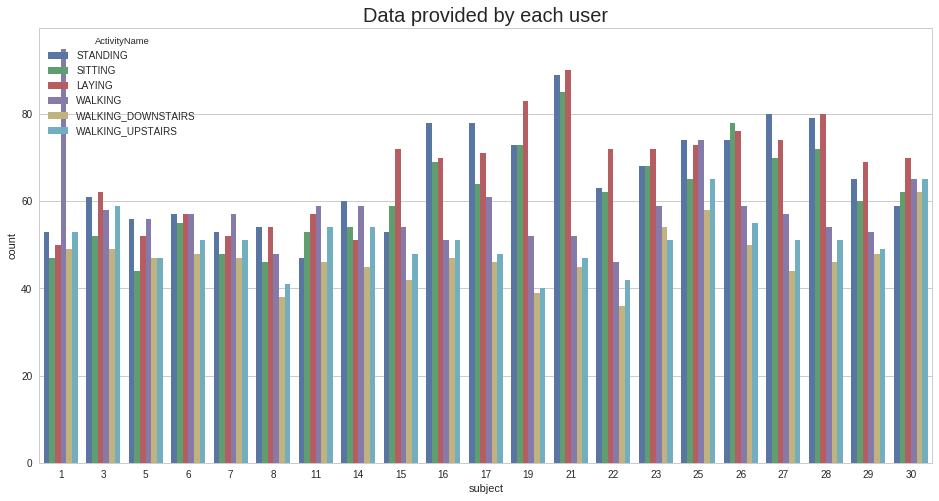

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName',data=train)
plt.show()

We have got almost same number of reading from all the subjects

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


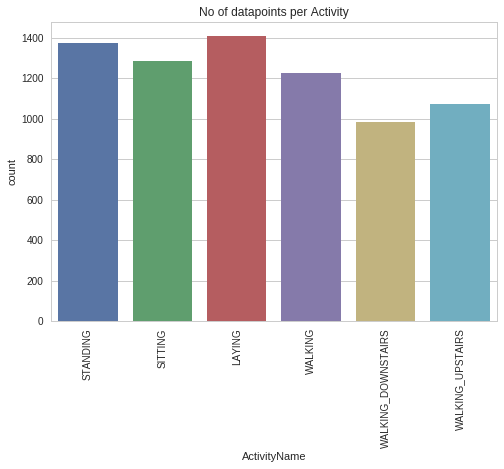

In [20]:
plt.title("No of datapoints per Activity")
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

##4. Save this dataframe in a csv files

In [0]:
train.to_csv('HAR_train.csv', encoding='utf-8', index=False)
test.to_csv('HAR_test.csv', encoding='utf-8', index=False)

In [0]:
from google.colab import files
files.download('HAR_train.csv')


In [0]:
files.download('HAR_test.csv')

# Exploratory Data Analysis

**1. Featuring Engineering from Domain Knowledge**
*  **Static and Dynamic Activities**
 *    In static activities (sit, stand, lie down) motion information will not be very useful.
 *    In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

**2. Stationary and Moving activities are completely different**

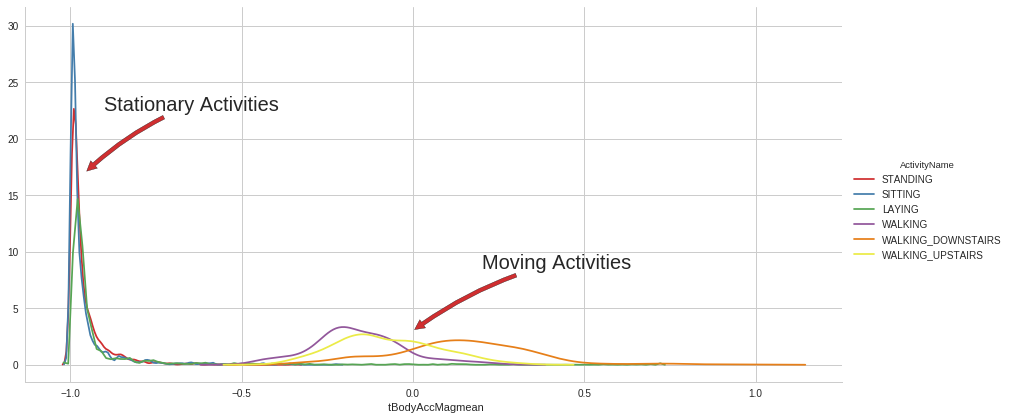

In [32]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,' tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

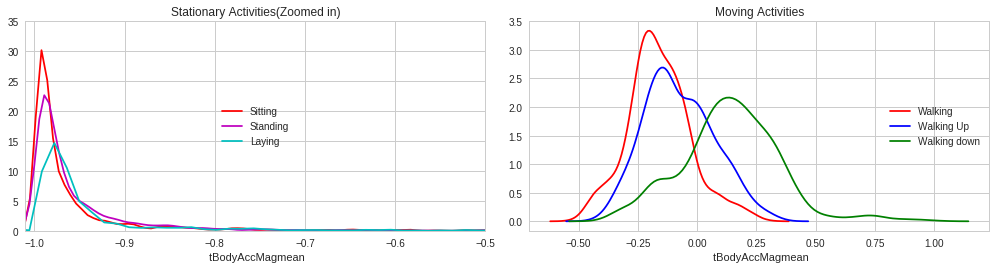

In [31]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4[' tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5[' tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6[' tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1[' tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2[' tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3[' tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


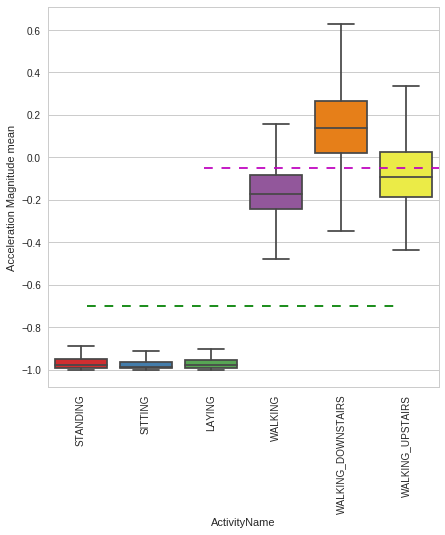

In [33]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y=' tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


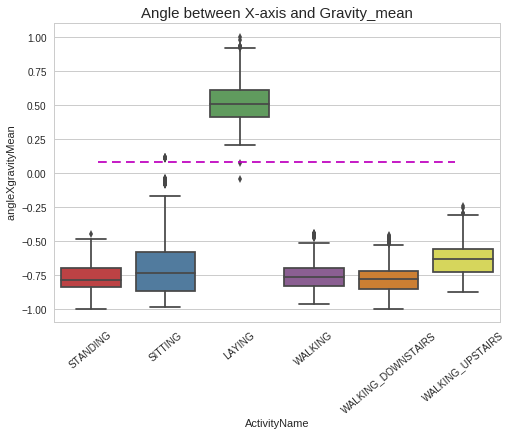

In [34]:
sns.boxplot(x='ActivityName', y=' angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


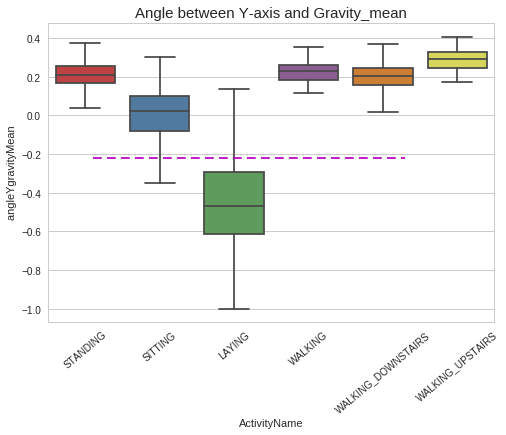

In [35]:
sns.boxplot(x='ActivityName', y=' angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [0]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.252s...
[t-SNE] Computed neighbors for 7352 samples in 43.327s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.048s
[t-SNE] Iteration 50: error = 124.7479324, gradient norm = 0.0228805 (50 iterations in 3.754s)
[t-SNE] Iteration 100: error = 107.2036743, gradient norm = 0.0343182 (50 iterations in

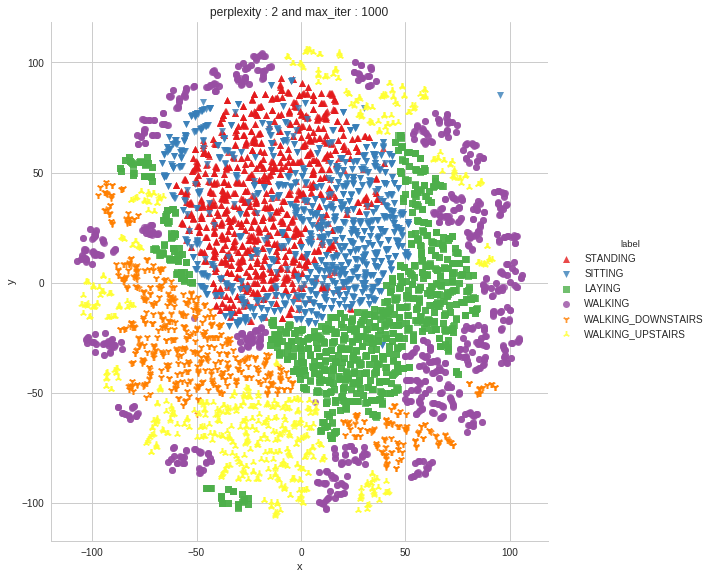

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.312s...
[t-SNE] Computed neighbors for 7352 samples in 44.781s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.071s
[t-SNE] Iteration 50: error = 113.9916916, gradient norm = 0.0201013 (50 iterations in 7.838s)
[t-SNE] Iteration 100: error = 97.3741531, gradient norm = 0.0160891 (50 iteratio

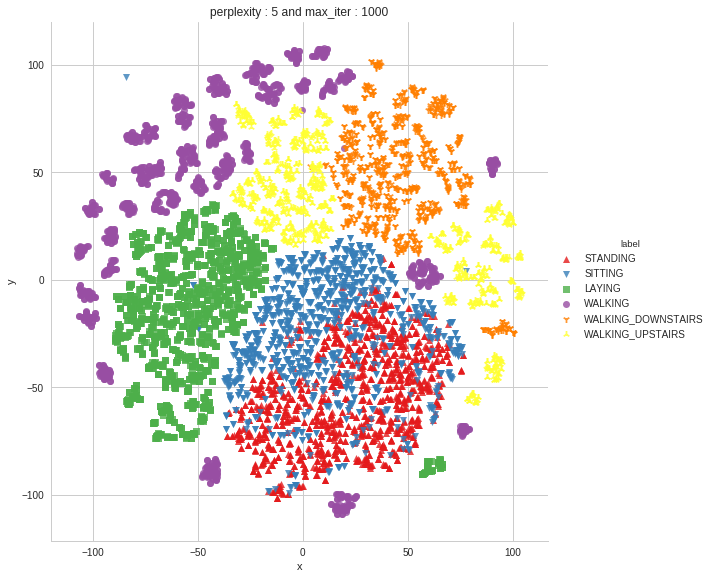

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.298s...
[t-SNE] Computed neighbors for 7352 samples in 45.927s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.128s
[t-SNE] Iteration 50: error = 105.2430878, gradient norm = 0.0273361 (50 iterations in 3.867s)
[t-SNE] Iteration 100: error = 90.2703247, gradient norm = 0.0097350 (50 iterati

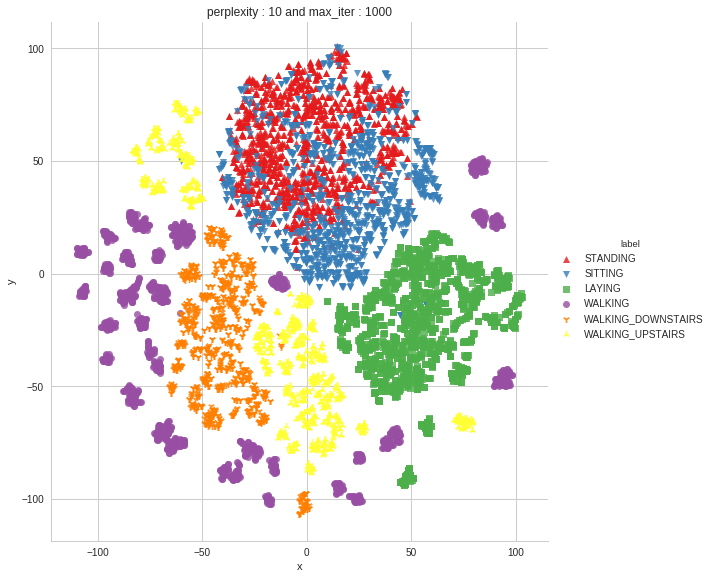

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.301s...
[t-SNE] Computed neighbors for 7352 samples in 46.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.251s
[t-SNE] Iteration 50: error = 96.9078293, gradient norm = 0.0262121 (50 iterations in 3.798s)
[t-SNE] Iteration 100: error = 83.9857635, gradient norm = 0.0074252 (50 iteratio

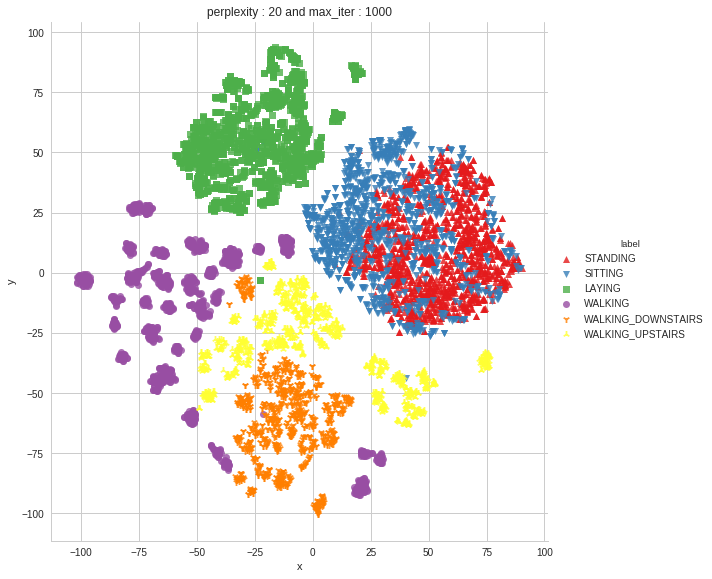

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.296s...
[t-SNE] Computed neighbors for 7352 samples in 50.944s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.620s
[t-SNE] Iteration 50: error = 84.3305359, gradient norm = 0.0362778 (50 iterations in 5.104s)
[t-SNE] Iteration 100: error = 75.4801559, gradient norm = 0.0037847 (50 iterati

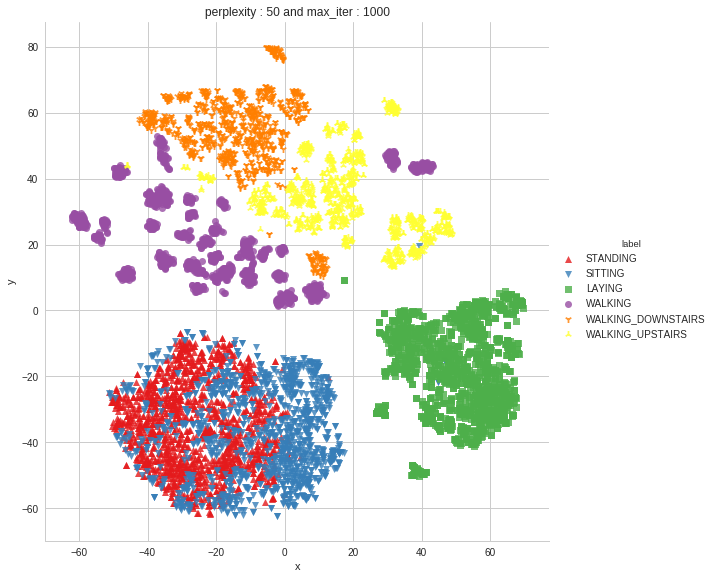

Done


In [38]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])